## Formulation

In [20]:
#Constants
import math
import numpy as np


Cp=1004 #J/Kg/K
Lv=2.5*math.pow(10,6) #J/kg
eta=0.622
Rd=287 #J/Kg/K
Rv=Rd/eta #J/Kg/K
g=9.8 #m/s2
gamma_d=g/Cp 
rho_a=1.225 #Kg/m3

### Estimation of saturation mixing ratio <br>
<img  width=400 src="../formulas/q.png">


In [21]:

def estimation_of_q(T,p):
    c1=Lv/Rv
    e=(6.11*100)*np.exp(c1*((1/273)-(1/T)))
    q=(eta*e)/p
    return q

### Estimation of Moist Temperature Lapse rate <br>
<img  width=200 src="../formulas/gamma_m.png">

In [22]:
def estimation_of_gamma_m(q,T):
    numerator=1+((Lv*q)/(Rd*T))
    denom=1+((Lv*Lv*q)/(Cp*Rv*T*T))
    gamma_m=gamma_d*(numerator/denom)
    return gamma_m

### Estimation of Condensation rate <br>
<img  width=400 src="../formulas/Cw.png">

In [23]:
def estimation_of_Cw(T,p):
    q=estimation_of_q(T,p)
    gamma_m=estimation_of_gamma_m(q,T)
    Cw=rho_a*(Cp/Lv)*(gamma_d-gamma_m)
    
    return Cw

### Estimation of Nd <br>
<img  width=400 src="../formulas/Nd.png">

In [24]:

def estimation_of_Nd(cloud_T,cloud_p,tau,re):
    k=0.8
    f_ad=1
    Cw=estimation_of_Cw(cloud_T,cloud_p)
    Q_ext=2
    rho_w=1000 #kg/m3

    c1=(np.sqrt(5)/(2*math.pi*k))
    numerator=f_ad*Cw*tau
    denom=Q_ext*rho_w*np.power(re,5)

    Nd=c1*np.sqrt(numerator/denom)
    return Nd

# Reading the Dataset and calucation

In [25]:
import xarray as xr

dataDIR="../../Datasets/FINAL_MODIS_PreMon.nc"
data = xr.open_dataset(dataDIR)

# cloud_T=data.Cloud_Top_Temperature_Mean.sel(time='2005-03-01T00:00:00.000000000')
# cloud_p=data.Cloud_Top_Pressure_Mean.sel(time='2005-03-01T00:00:00.000000000')
# re=data.Cloud_Effective_Radius_Liquid_Mean.sel(time='2005-03-01T00:00:00.000000000')
# tau=data.Cloud_Optical_Thickness_Combined_Mean.sel(time='2005-03-01T00:00:00.000000000')


cloud_T=data.Cloud_Top_Temperature_Mean
cloud_p=data.Cloud_Top_Pressure_Mean
re=data.Cloud_Effective_Radius_Liquid_Mean
tau=data.Cloud_Optical_Thickness_Combined_Mean

cloud_T=cloud_T[:,:,:].astype(np.double)
cloud_p=cloud_p[:,:,:].astype(np.double)
cloud_p=cloud_p*100
re=re[:,:,:].astype(np.double)
re=re*math.pow(10,-6)
tau=tau[:,:,:].astype(np.double)


Nd=estimation_of_Nd(cloud_T,cloud_p,tau,re)
# Nd=estimation_of_Nd(283,90000,80,21*math.pow(10,-6))
Nd=Nd*math.pow(10,-6)
Nd.to_netcdf("../../Datasets/Nd_PreMon.nc")


# Ploting

In [26]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

ploting For Nd

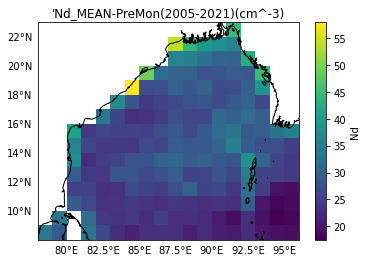

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree())
dataDIR="../../Datasets/Nd_PreMon.nc"
data = xr.open_dataset(dataDIR)
data['Nd'] = data['__xarray_dataarray_variable__']
data = data.drop(['__xarray_dataarray_variable__'])

Nd=data.Nd
Nd=Nd[:,:,:].astype(np.double)


Nd_mean=Nd.mean(dim='time', skipna=True)
Nd_mean.plot(ax=ax) 
lat, lon = Nd_mean.indexes.values()
# plt.contourf(lon, lat, Nd_mean, 60,
#              transform=ccrs.PlateCarree())
plt.title("'Nd_MEAN-PreMon(2005-2021)(cm^-3)")
ax.coastlines()
gridlines = ax.gridlines(draw_labels=True,linewidth=0)
gridlines.top_labels = False
gridlines.right_labels = False
plt.savefig('Nd_MEAN-PreMon(2005-2021).png',dpi=300)
# ax.legend()
plt.show()


ploting or Aod

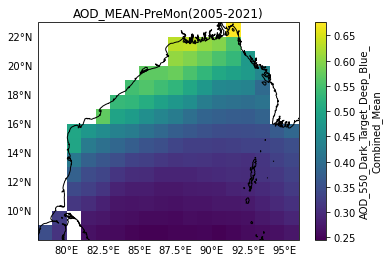

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree())

dataDIR="../../Datasets/FINAL_MODIS_PreMon.nc"
data = xr.open_dataset(dataDIR)
AOD=data.AOD_550_Dark_Target_Deep_Blue_Combined_Mean
AOD=AOD[:,:,:].astype(np.double)

AOD_mean=AOD.mean(dim='time', skipna=True)
AOD_mean.plot(ax=ax) 
ax.coastlines()

gridlines = ax.gridlines(draw_labels=True,linewidth=0)
gridlines.top_labels = False
gridlines.right_labels = False

plt.title("AOD_MEAN-PreMon(2005-2021)")
plt.savefig('AOD_MEAN-PreMon(2005-2021).png',dpi=300)
plt.show()